In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('c:\\Users\\User\\Desktop\\Financial Data specialist\\GIT AND GITHUB\\AGRI-CREDIT ASSESMENT MODEL\\DATA\\DATA-EXPLORATION\\EA_Agriculture_data_final.csv')

In [4]:
X=df.drop(columns=['Unnamed: 0','default_probability'])
y=df['default_probability']

In [8]:
from sklearn.model_selection import train_test_split


In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=101)

In [10]:
from sklearn.preprocessing import StandardScaler


In [11]:
scaler=StandardScaler()

In [13]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [14]:
from sklearn.linear_model import ElasticNet

In [15]:
model=ElasticNet(max_iter=1000000)

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
param_grid={'alpha':[0.1,1,5,10,50,100],
           'l1_ratio':[0.1,0.3,0.5,0.8,0.99,1]}


In [18]:
grid_model=GridSearchCV(estimator=model,
                       param_grid=param_grid,
                       scoring='neg_mean_squared_error',
                       cv=5,verbose=1)

In [19]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=ElasticNet(max_iter=1000000),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.8, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [20]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.1, max_iter=1000000)

In [21]:
y_pred=grid_model.predict(X_test)


In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [24]:
print(mse)
print(rmse)

0.004303779237545212
0.06560319533029785


In [25]:
from sklearn.linear_model import ElasticNetCV

In [26]:
model_2=ElasticNetCV()

In [27]:
model_2.fit(X_train,y_train)

ElasticNetCV()

In [28]:
model_2.coef_

array([-8.60366392e-03, -1.03840352e-02, -2.04197883e-03, -6.68068964e-03,
       -2.73768028e-03, -2.48383668e-02, -1.36439644e-02, -3.97323952e-03,
        1.46165354e-03, -1.36568247e-02, -1.41907972e-02, -5.10248511e-04,
       -1.24123033e-02, -1.70676298e-02, -1.86899362e-02, -3.51650166e-03,
       -6.96577004e-04, -2.46660198e-04,  7.51033345e-03,  1.71558132e-03,
       -1.53092809e-03,  2.01795470e-05, -3.18089996e-04, -1.31061362e-02,
        8.65304121e-04,  3.78828880e-03])

In [29]:
y_pred_2=model_2.predict(X_test)

In [30]:
mse_2=mean_squared_error(y_test,y_pred_2)
rmse_2=np.sqrt(mse_2)

In [31]:
print(mse_2)
print(rmse_2)

0.0032536666671515928
0.0570409209879328


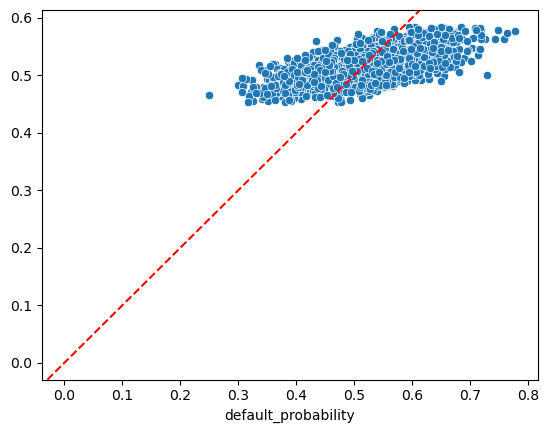

In [32]:
sns.scatterplot(x=y_test,y=y_pred)
plt.axline(xy1=(0, 0), slope=1, color='r', linestyle='--', label='y=x')

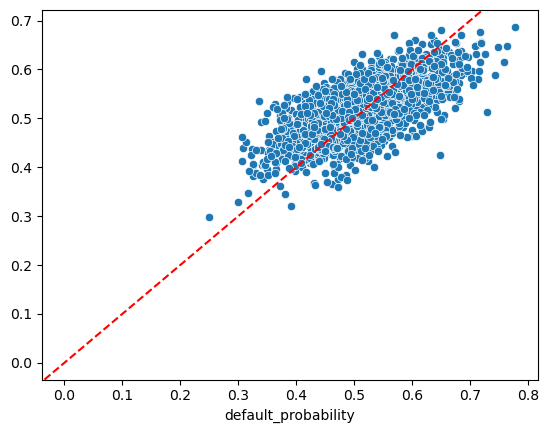

In [33]:
sns.scatterplot(x=y_test,y=y_pred_2)
plt.axline(xy1=(0, 0), slope=1, color='r', linestyle='--', label='y=x')

In [34]:
test_data = pd.DataFrame({
    # Low Risk Applicant
    'age': [45, 28, 38],
    'months_as_mobile_user': [36, 8, 24],
    'total_transaction_volume_6mo_usd': [2500, 450, 1200],
    'avg_account_balance_usd': [800, 120, 350],
    'has_mobile_savings': [1, 0, 1],
    'previous_loan_repaid': [1, 0, 1],
    'bill_payment_consistency': [0.85, 0.35, 0.62],
    'farm_size_acres': [8, 2, 5],
    'farming_experience_years': [20, 5, 12],
    'has_irrigation': [1, 0, 0],
    'uses_improved_seeds': [1, 0, 1],
    'previous_yield_bags': [45, 12, 28],
    'has_off_farm_income': [1, 0, 0],
    'cooperative_member': [1, 0, 1],
    'has_buyer_contract': [1, 0, 0],
    'ndvi_current': [0.75, 0.42, 0.58],
    'ndvi_historical_avg': [0.72, 0.38, 0.55],
    'soil_moisture_index': [0.65, 0.35, 0.48],
    'distance_to_market_km': [3.5, 18, 8],
    'distance_to_input_dealer_km': [4.2, 22, 10],
    'road_quality_score': [4, 2, 3],
    'available_references': [8, 1, 4],
    'has_trade_credit_history': [1, 0, 1],
    'has_crop_insurance': [1, 0, 0],
    'years_in_location': [18, 3, 10],
    'loan_default':[0,1,0]
})
# Labels for interpretation
applicant_labels = ['Low Risk', 'High Risk', 'Medium Risk']


In [35]:
test_data_scaled=scaler.transform(test_data)

In [40]:
predictions=grid_model.predict(test_data_scaled)

In [41]:
for i, (label, pred) in enumerate(zip(applicant_labels, predictions)):
    print(f"\nApplicant {i+1}: {label}")
    print(f"  Predicted Default Probability: {pred:.4f} ({pred*100:.2f}%)")
    
    # Risk assessment
    if pred < 0.4:
        risk_level = "LOW RISK"
        decision = "APPROVE - Standard terms"
    elif pred < 0.55:
        risk_level = "MEDIUM RISK"
        decision = "APPROVE - Monitor closely or higher rate"
    else:
        risk_level = "HIGH RISK"
        decision = "REJECT or require collateral"
    
    print(f"  Risk Level: {risk_level}")
    print(f"  Recommendation: {decision}")



Applicant 1: Low Risk
  Predicted Default Probability: 0.4538 (45.38%)
  Risk Level: MEDIUM RISK
  Recommendation: APPROVE - Monitor closely or higher rate

Applicant 2: High Risk
  Predicted Default Probability: 0.5902 (59.02%)
  Risk Level: HIGH RISK
  Recommendation: REJECT or require collateral

Applicant 3: Medium Risk
  Predicted Default Probability: 0.5147 (51.47%)
  Risk Level: MEDIUM RISK
  Recommendation: APPROVE - Monitor closely or higher rate


In [42]:
pred=model_2.predict(test_data_scaled)

In [43]:
for i, (label, pred) in enumerate(zip(applicant_labels, predictions)):
    print(f"\nApplicant {i+1}: {label}")
    print(f"  Predicted Default Probability: {pred:.4f} ({pred*100:.2f}%)")
    
    # Risk assessment
    if pred < 0.4:
        risk_level = "LOW RISK"
        decision = "APPROVE - Standard terms"
    elif pred < 0.55:
        risk_level = "MEDIUM RISK"
        decision = "APPROVE - Monitor closely or higher rate"
    else:
        risk_level = "HIGH RISK"
        decision = "REJECT or require collateral"
    
    print(f"  Risk Level: {risk_level}")
    print(f"  Recommendation: {decision}")




Applicant 1: Low Risk
  Predicted Default Probability: 0.4538 (45.38%)
  Risk Level: MEDIUM RISK
  Recommendation: APPROVE - Monitor closely or higher rate

Applicant 2: High Risk
  Predicted Default Probability: 0.5902 (59.02%)
  Risk Level: HIGH RISK
  Recommendation: REJECT or require collateral

Applicant 3: Medium Risk
  Predicted Default Probability: 0.5147 (51.47%)
  Risk Level: MEDIUM RISK
  Recommendation: APPROVE - Monitor closely or higher rate


In [48]:
print(rmse)
print(mse)
print(mse_2)
print(rmse_2)

0.06560319533029785
0.004303779237545212
0.0032536666671515928
0.0570409209879328
